In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline
plt.style.use('default')

In [2]:
churn_data = pd.read_csv('data/churn.csv', sep=',')
# churn_data.head()
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Нет пропущенных значений (NaN).

Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Задача: выяснить основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

In [37]:
# удаление номер строки- это лишняя информация.
churn_data.drop('RowNumber', axis= 1 , inplace= True )
# churn_data.drop (churn_data.columns [[0]], axis= 1 , inplace= True )

ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

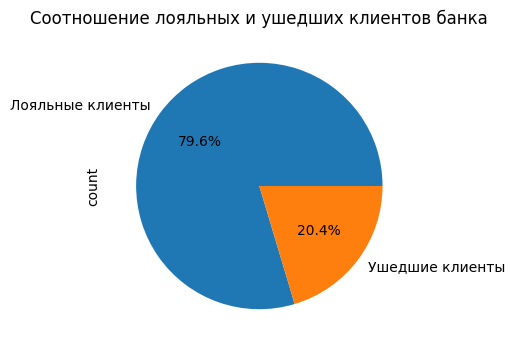

In [5]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
# чтобы найти соотношение долей построим pie chart (круговую диаграмму), Ушедшие и Лояльные клиенты это 100% от общего к-ва клиентов и 
# составляют 2 доли. Воспользуемся встроенными возможностями визуализации библиотеки pandas. Для данной задачи её возможностей
# вполне достаточно.
# 1. Посчитаем к-во значений '0' и отдельно значений '1' признака Exited (то есть лояльных и ушедших клиентов)
# 2. Построим круговую диаграмму Series с значениями к-ва лояльных и ушедших клиентов. Круговая диаграмма показывает соотношения значений с
# разными индексами.
# print(churn_data['Exited'].value_counts())
churn_data['Exited'].value_counts().plot(
    kind='pie',
    figsize=(12, 4),
    autopct='%0.1f%%',
    legend=False,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    title='Соотношение лояльных и ушедших клиентов банка',   
);

Ответ:
Из Круговой диаграммы видно: 
- 20.4% клиентов предпочли уйти из банка. Остальные 79.6% остаются лояльными банку клиентами. Это значит, что более чем, каждый четаертый клиент ушел. Для выяснения причин ухода, необходимо изучить свойства и характеристики оставшихся клиентов в сравнении с ушедшими.

In [39]:
#9.2. Постройте график, показывающий распределение балансов пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.

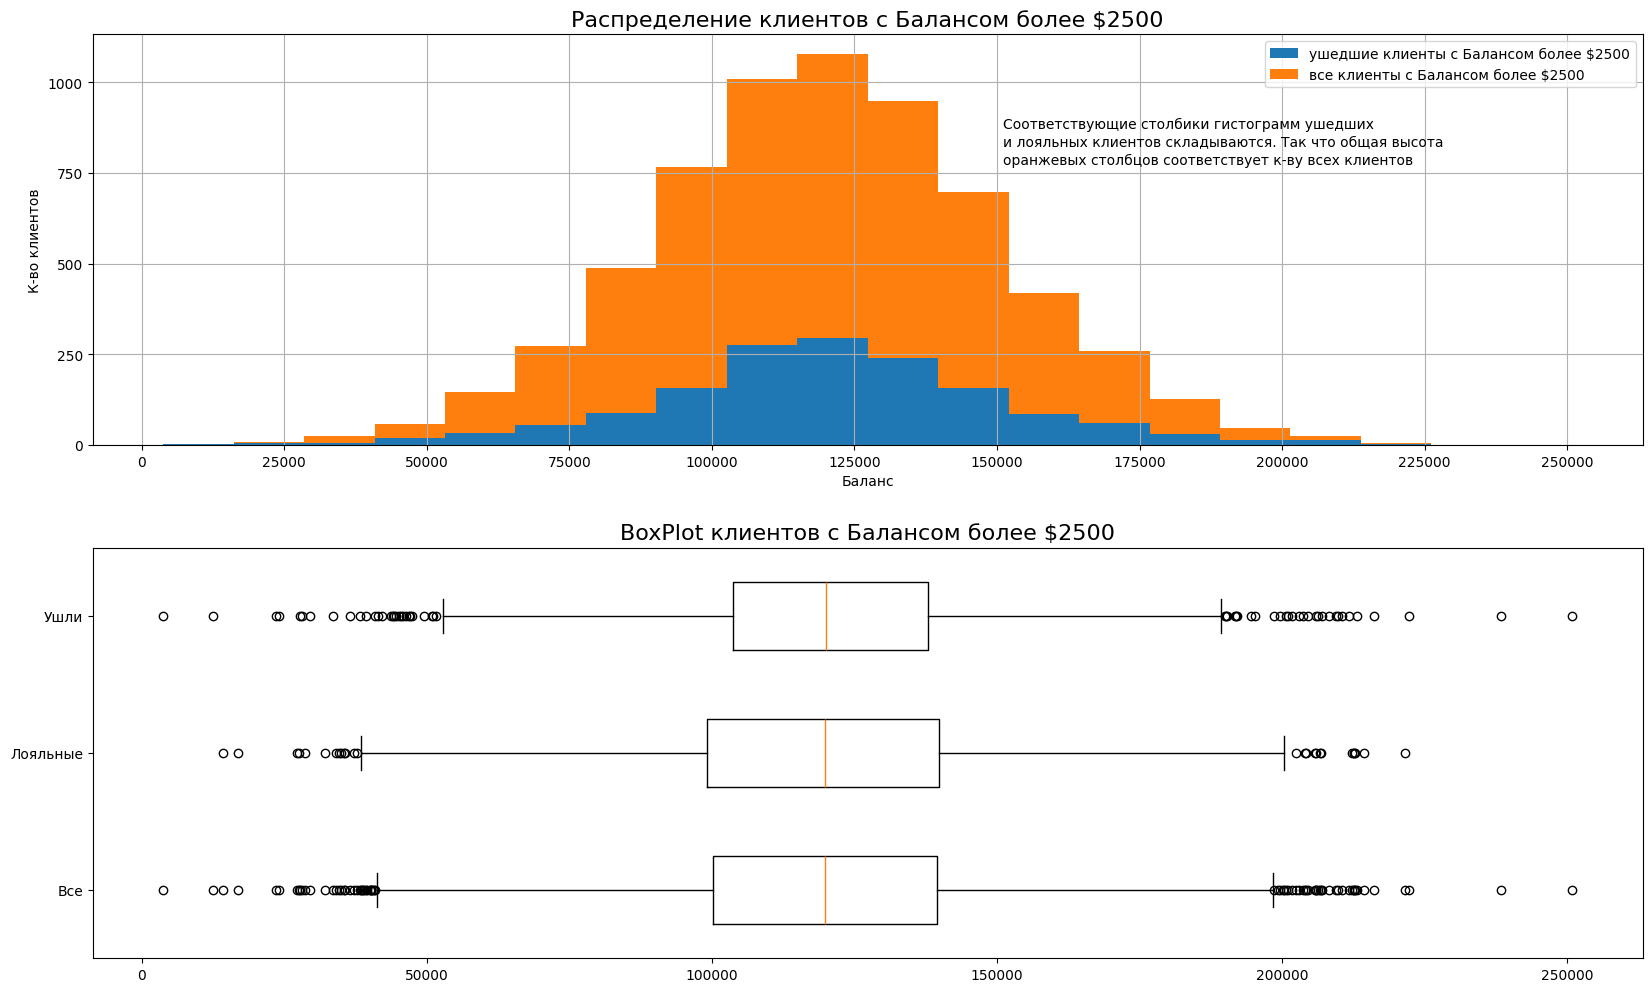

In [108]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.
# Баланс- это числовой, непрерывный признак. Для представления распределения баланса подойдет гистограмма или ящик с усами.
# 1. Отфильтруем фокуную группу. 2. С помощью библиотеки Matplotlib построим необходимые диаграммы с разбиением на категории лояльных
# и ушедших пользователей
#
# b_cust Клиенты с балансом более $2500; b_cust_l лояльные клиенты с балансом более $2500; b_cust_nl ушедшие клиенты с балансом более $2500
b_cust = churn_data[churn_data['Balance'] > 2500.0]
b_cust_l = churn_data[(churn_data['Balance'] > 2500.0) & (churn_data['Exited'] == 0)]
b_cust_nl = churn_data[(churn_data['Balance'] > 2500.0) & (churn_data['Exited'] == 1)]

#визуализация систем координат
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
plt.subplots_adjust(hspace=.25)
#Гистограмма
axes[0].hist(
    #гистограмма для всех клиентов получается автоматически, т.к используется параметр stacked=True
    [b_cust_nl['Balance'], b_cust_l['Balance']],
    bins=20,
    stacked=True,
    label=['ушедшие клиенты с Балансом более $2500', 'все клиенты с Балансом более $2500'],
)
axes[0].set_title('Распределение клиентов с Балансом более $2500', fontsize=16)
axes[0].set_xlabel('Баланс', c='black')
axes[0].set_ylabel('К-во клиентов', c='black')
axes[0].set_yticks(range(0, 1250, 250))
axes[0].set_xticks(range(0, 255000, 25000))
axes[0].xaxis.set_tick_params(rotation=0)
axes[0].grid()
axes[0].text(151000, 875, 'Соответствующие столбики гистограмм ушедших')
axes[0].text(151000, 825, 'и лояльных клиентов складываются. Так что общая высота')
axes[0].text(151000, 775, 'оранжевых столбцов соответствует к-ву всех клиентов')      
axes[0].legend();

#ящик с усами
axes[1].boxplot(
    [b_cust['Balance'], b_cust_l['Balance'], b_cust_nl['Balance']],
    vert=False,
    # patch_artist=['pink', 'lightblue', 'lightgreen'],
    widths=[0.5, 0.5, 0.5],
    labels=['Все', 'Лояльные', 'Ушли']  # will be used to label x-ticks
    )
# axes[1].set_title('Ящик с усами')
axes[1].xaxis.set_tick_params(rotation=0)
axes[1].set_title('BoxPlot клиентов с Балансом более $2500', fontsize=16)
plt.show()

Ответ:
Распределения клиентов с балансом выше $2500 по виду близки к нормальному распределению. На это так же указывают положения медиан (практически  в середине) на бокс плоте в районе $122000. Клиенты с балансом $114000- $126000 самая многочисленная группа (около 1125 человек). Клиетов с балансом от $2500 до $25000 и выше $220000 незначительно мало. 50% клиетов- это клиенты с балансом $100000-$140000. У ушедших клиентов верхний и нижний квартиль расположен ближе к медиане то же относится и к граничным точкам 'усов'. Вцелом ушедшие клиенты имееют сравнительно меньший размах с медианой в центре и большее к-во выбросов по сравнению с лояльными клиентами.

In [ ]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и 
# лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

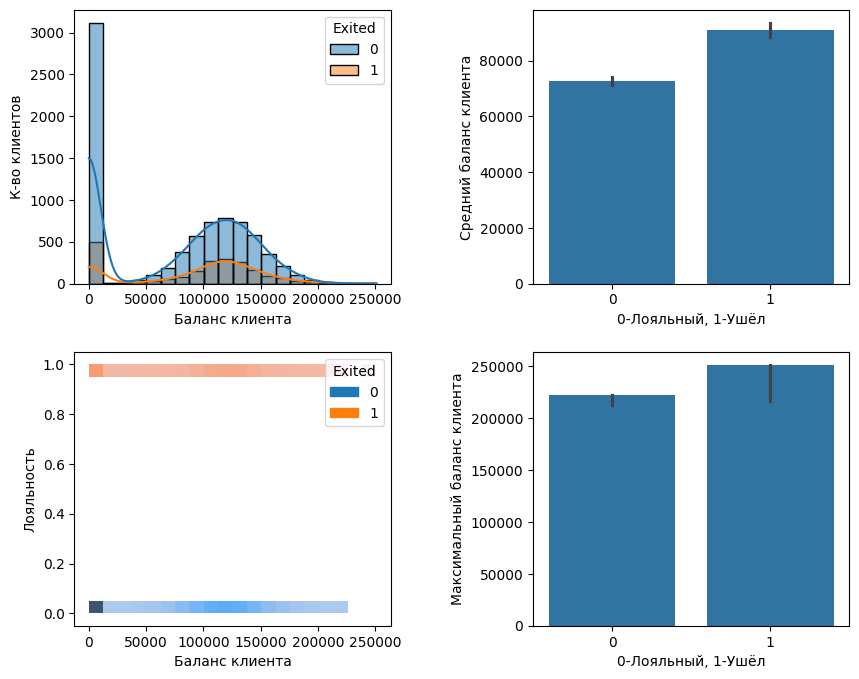

In [40]:
# гистограмма баланса- полный DataSet
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(hspace=.25)
plt.subplots_adjust(wspace=.45)
hist_p=sns.histplot(
    data=churn_data,
    x='Balance',
    bins=20,
    kde=True,
    hue='Exited',
    ax=axes[0][0]
)
hist_p.set_xlabel('Баланс клиента')
hist_p.set_ylabel('К-во клиентов')
# гистограмма с разбиением по лояльности. Чем более интенсивный цвет, тем больше значений 
sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=20,
    color='red',
    hue='Exited',
    legend=[['Лояльный'], ['Ушёл']],
    ax=axes[1][0]
)
axes[1][0].set_xlabel('Баланс клиента')
axes[1][0].set_ylabel('Лояльность')
# Слбчатая диаграмма средних балансов для лояльных и ушедших клиентов
sns.barplot(
    data=churn_data,
    x='Exited',
    y='Balance',
    estimator='mean',
    ax=axes[0][1]
)
axes[0][1].set_ylabel('Средний баланс клиента')
axes[0][1].set_xlabel('0-Лояльный, 1-Ушёл')
# Слбчатая диаграмма максимальных балансов для лояльных и ушедших клиентов
sns.barplot(
    data=churn_data,
    x='Exited',
    y='Balance',
    estimator='max',
    ax=axes[1][1]
)
axes[1][1].set_ylabel('Максимальный баланс клиента')
axes[1][1].set_xlabel('0-Лояльный, 1-Ушёл');
plt.show()

Ответ:
Из представленных диаграмм можно сделать следующий вывод и предполжение. 1. Очень много (более 3000) клиентов с балансом ниже $2500, особенно среди лояльных клиентов (более 2500 клиентов). Это видно из диаграмм первого столбца. 2. Вопреки тому, что лояльных клиентов боьше в четыре раза, чем ушедших средний баланс и максимальный баланс больше у ушедших клиентов. Особенно показательна диаграмма для среднего баланса (вторая диаграмма во первом ряду), с её ошибками среднего. Это может быть связано стем, что условия хранения денег на накопительных счетах с крупной суммой менее выгодные, чем у конкурентов и это не устраивает "крупных" клиентов.

#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

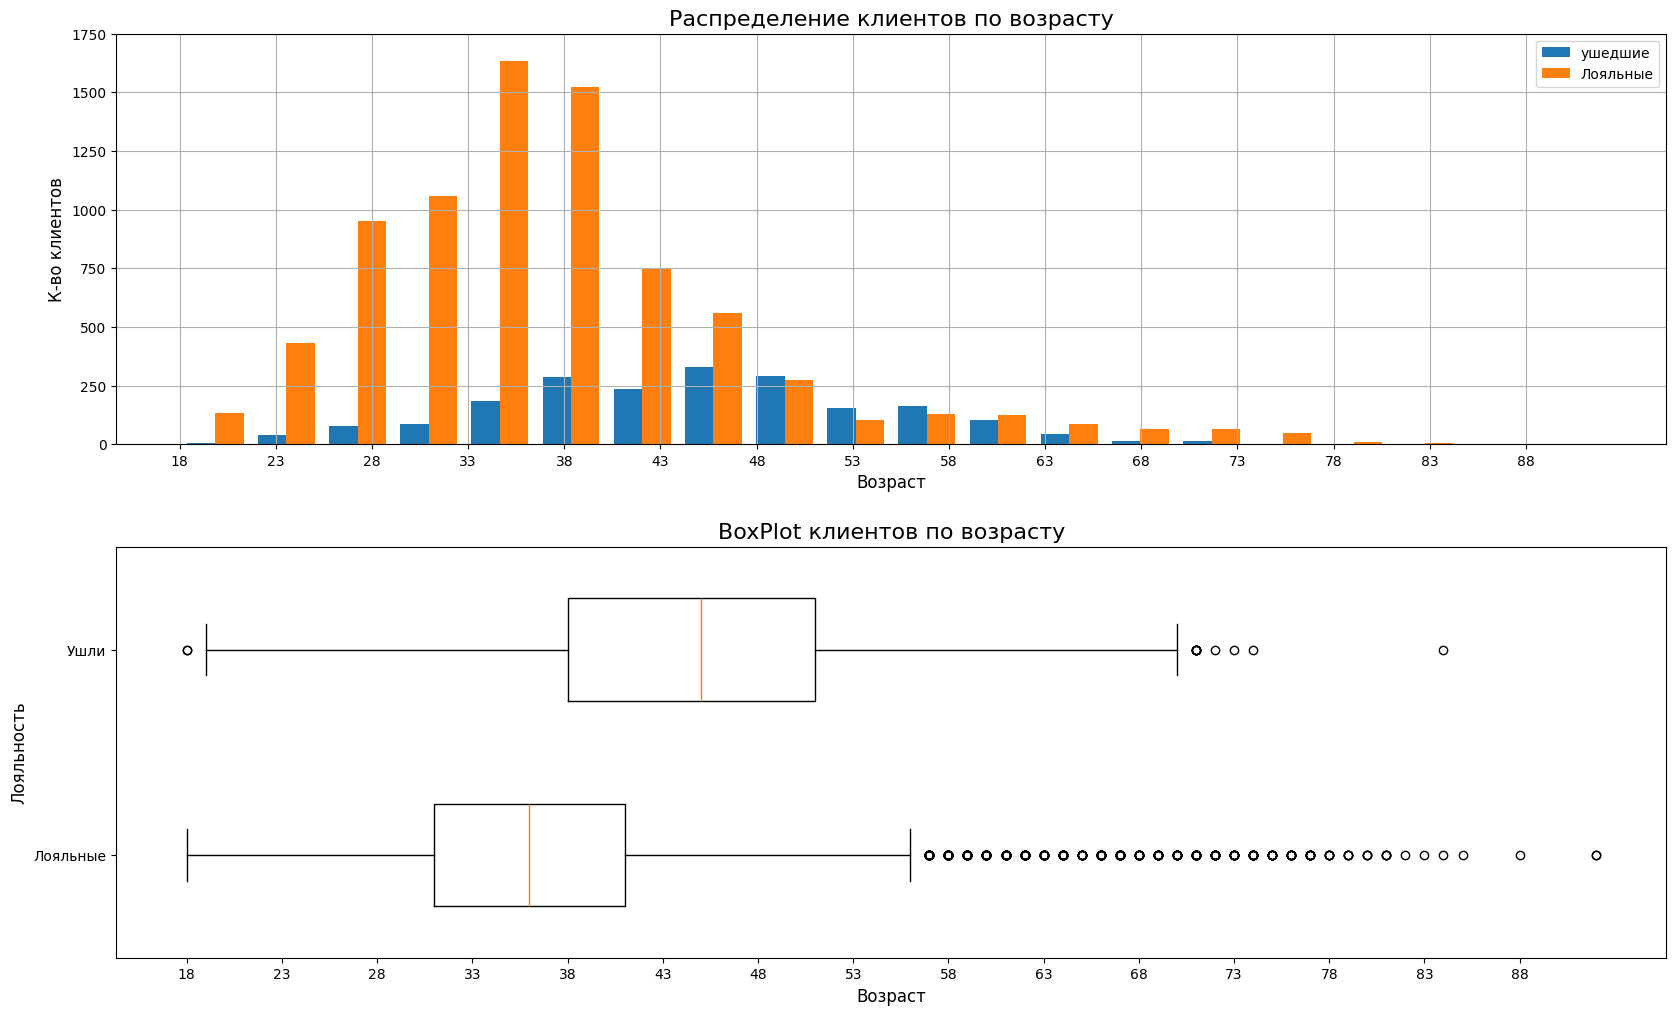

In [41]:
# создадим отдельные Dataframs для лояльных и ушедших клиентов
c_l = churn_data[churn_data['Exited'] == 0]
c_nl = churn_data[churn_data['Exited'] == 1]
#визуализация систем координат
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
plt.subplots_adjust(hspace=.25)
#Гистограмма, показывающая распределение клиентов по возрасту в разрезе лояльности банку
axes[0].hist(
    [c_nl['Age'], c_l['Age']],
    bins=20,
    stacked=False,
    label=['ушедшие', 'Лояльные']
)
axes[0].set_title('Распределение клиентов по возрасту', fontsize=16)
axes[0].set_xlabel('Возраст', c='black', fontsize=12)
axes[0].set_ylabel('К-во клиентов', c='black', fontsize=12)
axes[0].set_yticks(range(0, 2000, 250))
axes[0].set_xticks(range(18, 90, 5))
axes[0].xaxis.set_tick_params(rotation=0)
axes[0].legend()
axes[0].grid()
axes[1].boxplot(
    [c_l['Age'], c_nl['Age']],
    vert=False,
    widths=[0.5, 0.5],
    labels=['Лояльные', 'Ушли']
    )
axes[1].xaxis.set_tick_params(rotation=0)
axes[1].set_xticks(range(18, 90, 5))
axes[1].set_xlabel('Возраст', c='black', fontsize=12)
axes[1].set_ylabel('Лояльность', c='black', fontsize=12)
axes[1].set_title('BoxPlot клиентов по возрасту', fontsize=16)
plt.show();

Ответ и Выводы по диаграмме: 
1. Самая многочисленная группа лояльных пользователей имеет возраст 35 лет, ушедших- 45-46 лет. От 48 лет до 60 лет ушедших пользователей больше, чем лояльных.
2. Вцелом лояльные клиенты более молодые. После возраста 45 лет у клиентов возникает желание уйти. Только после 65 лет эта тенденция меняется.
3. Потенциальных выбросов по возрасту больше в группе лояльных клиентов со стороны верхней границы возраста- это видно из коробчатой диаграммы.
4. Ранее мы выяснили, что балансы счетов у ушедших клиентов всреднем выше, чем у лояльных. Можно предположить, что у банка нет конкурентноспособных планов сбережения для людей предпенсионного и пенсионного возраста.
5. Банку необходимо обратить внимание на категорию людей от 48 лет до пенсионного возраста, когда люди начинают активно действовать в направлении увеличения пенсионных накоплений и будущих пенсионных выплат и предложить им продукты отвечающие их интересам.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

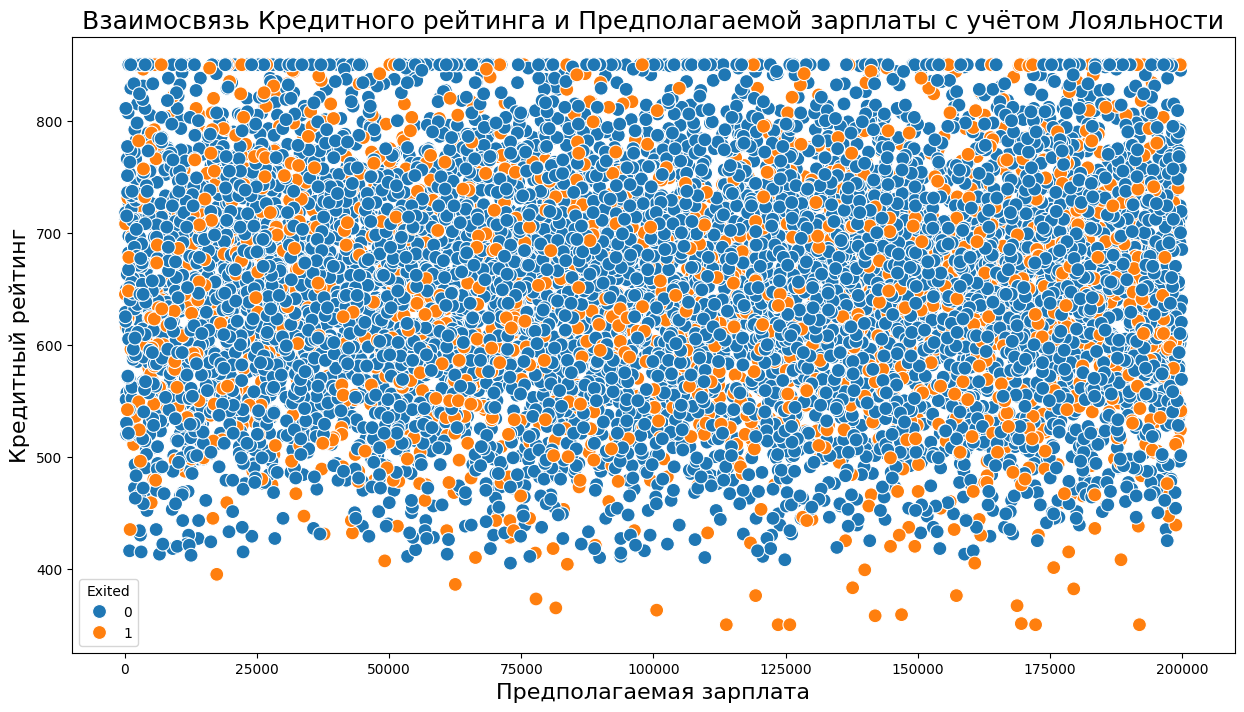

In [114]:
# скатер плот. EstimatedSalary (предполагаемая зарплата)- числвой непрерывный признал (float64)
# CreditScore (кредитный ретинг) - числовой непрерывный признал (int64). 'Exited (признак лояльности) - категориальный
# построим 2-мерную диаграмму рассевания, с расцветкой по признаку Exited.
fig = plt.figure(figsize=(15, 8))
scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=100,
    # size='EstimatedSalary',
    sizes=(50, 300)
)
scatterplot.set_title('Взаимосвязь Кредитного рейтинга и Предполагаемой зарплаты c учётом Лояльности', fontsize=18)
scatterplot.set_xlabel('Предполагаемая зарплата', fontsize=16)
scatterplot.set_ylabel('Кредитный рейтинг', fontsize=16)
plt.show()

Ответ и Выводы: 
1. Взаимосвязь между Кредитным ретингом и Предполагаемой зарплaтой не видна. По всему диапазону зарплат есть клиенты, как со значением Кредитного рейтинга таже по всему диапазону. Есть некоторые пустоты по признаку зарплата вдоль верхней и нижней границы рейтингов.
2. Ушедшие клиенты и лояльные равномерно распределены по всему полю системы координат (Предполагаемая зарплата- Кредитный рейтинг). Разве можно отметить, что с аномально низким рейтингом присутствуют только ушедшие клиенты, но скорее всего это ошибочные выбросы.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

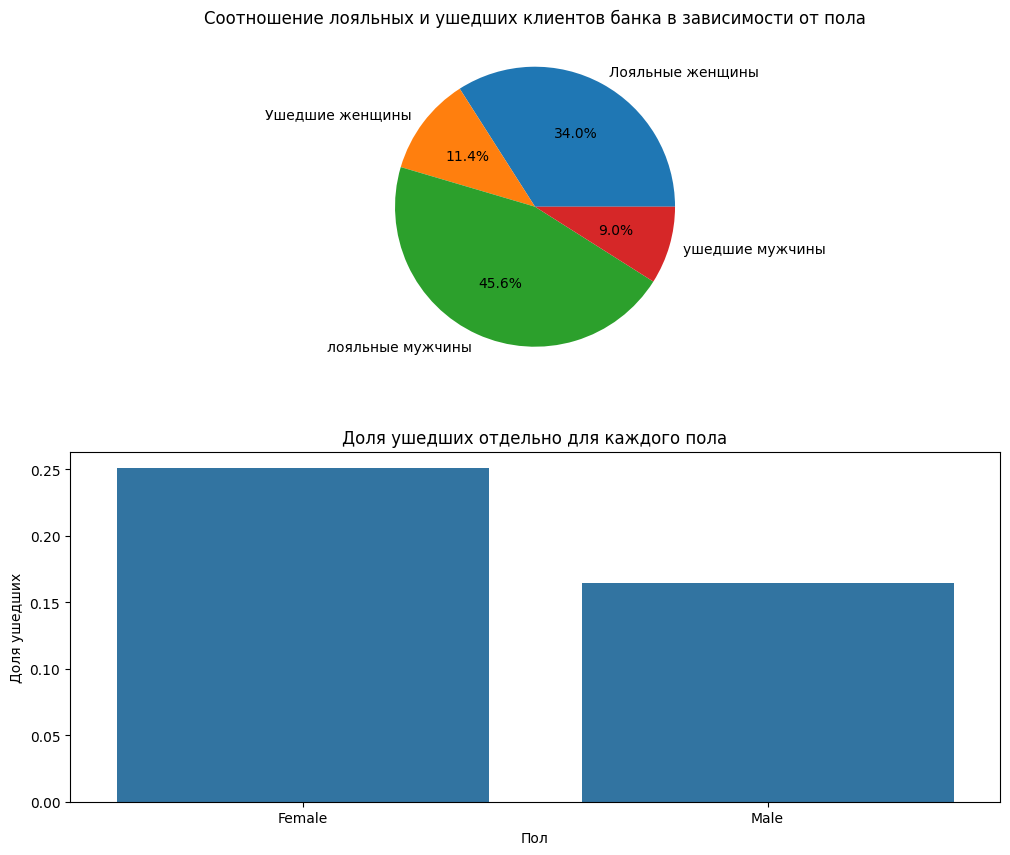

In [46]:
# Построим барплот, показывающий долю ушедших мужчин от общего числа мужчин и аналогично для женщин.
# группируем по полу и считаем среднее для признака лояльности. Таким образом отдельно для каждого пола узнаем долю ушедших клиентов.
gr_c1 = churn_data.groupby(by=['Gender'], as_index=True)[['Exited']].mean()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
# plt.subplots_adjust(hspace=.50)
plt.subplots_adjust(wspace=.50)
barplot = sns.barplot(
    data= gr_c1,
    x='Gender',
    y='Exited',
    ax=axes[1]
 )
# чтобы найти соотношение построим pie chart (круговую диаграмму), Ушедшие и Лояльные мужчины и женщины эти четыре категории составляют 
# 100% от общего к-ва клиентов.
# группируем сначало по полу, потом по лояльности и подсчитываем к-во записей в каждой категории по индентификатору. Построим круговую
# диаграмму т.к. составляющие категории образуют 100% клиентов. Так узнаем соотношение лояльных и ушедших клиентов, в зависимости от пола
# в % от от общего числа клиентов.
grouped_cust1 = churn_data.groupby(by=['Gender', 'Exited'], as_index=True)['CustomerId'].count()
grouped_cust1.plot(
    kind='pie',
    y='Exited',
    autopct='%0.1f%%',
    legend=False,
    labels=['Лояльные женщины', 'Ушедшие женщины', 'лояльные мужчины', 'ушедшие мужчины'],
    title='Соотношение лояльных и ушедших клиентов банка в зависимости от пола',
    ax=axes[0] 
)
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Доля ушедших')
axes[1].set_title('Доля ушедших отдельно для каждого пола')
# axes[1].set_xlabel('Пол')
axes[0].set_ylabel(' ')
plt.show;

Ответ и Выводы:
1. Из Круговой диагрыммы следует, что хотя мужчин- клиентов больше у банка, чем женщин. Ушедших же мужчин меньше, чем ушедших женщин на 2.4% от общего числа клиентов.
2. Из Столбчатой диаграммы следует, что если считать доли ушедших отдельно для мужчин и женщин, то доля уходящих женщин существенно выше 0.25 против 0.17.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

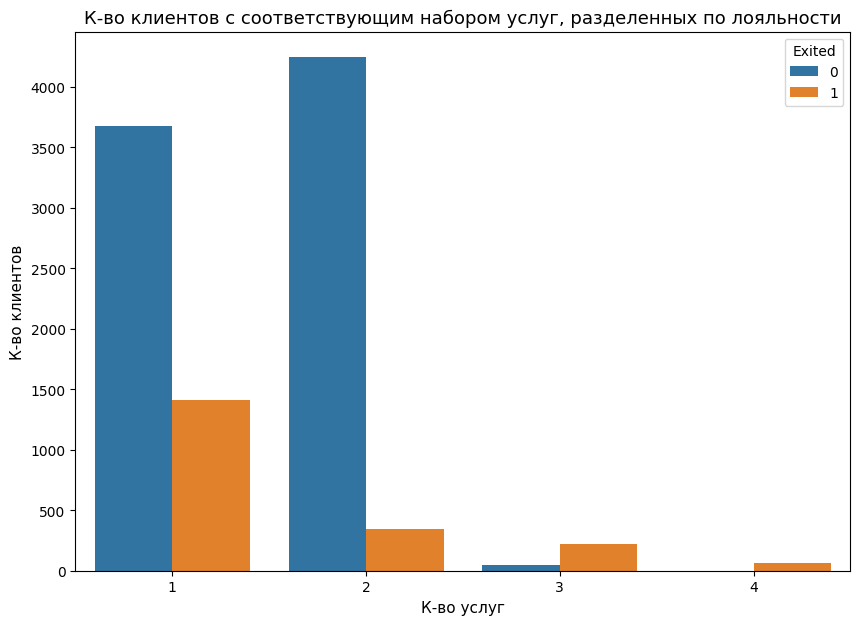

In [47]:
# Зависимость числового признака от двух категориальных.
# группируем данный Дата фрейм по ко-ву услуг (NumOfProducts), 
# а потом для каждого к-ва услуг- по лояльности(Exited). Для каждого получившегося сочетания признаков посчитаем к-во клиентов
group_nu = churn_data.groupby(by=['NumOfProducts', 'Exited'], as_index=True)[['CustomerId']].count()
# построим многоуровневую столбчатую диаграмму. Источник данных наша сгруппированная таблица group_nu. В качестве параметра hue, 
# выберем лольность (Exited), по оси х- к-во услуг (NumOfProducts), по оси у- среднее (в нашем случае это единственное значение) к-во клиентов,
# соответствующих сочетантю данных признаков. 
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data= group_nu,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited'
)
barplot.set_title('К-во клиентов с соответствующим набором услуг, разделенных по лояльности', fontsize=13)
barplot.set_xlabel('К-во услуг', fontsize=11)
barplot.set_ylabel('К-во клиентов', fontsize=11)
plt.show;
# display(group_nu)

Ответ:
Из диаграммы видно, что к-во услуг банка существенно влияет на лояльность клиентов. Переход от одной услуги к двум повышает к-во лояльных клиентов и в четверо понижает к-во ушедших. Совсем другую картину наблюдаем при переходе от 2-х к трём услугам- к-во лояльных клиентов падает драматически (до 46), немного уменьшается и к-во ушедших (с 348 до 220). Можно сделать вывод, что три услуги весьма не популярно у клиентов. Набор из четырех услуг вообще аннигилирует лояльных клиентов, остается лишь незначительная часть (60 человек), которые уйдут.
Вывод: Две услуги - оптимальное к-во услуг. Три и особенно четыре не устраиает клиентов. Возможно это связано с видом самих третьей и четвертой услуги. Выяснение этого требует дальнейшего исследования.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

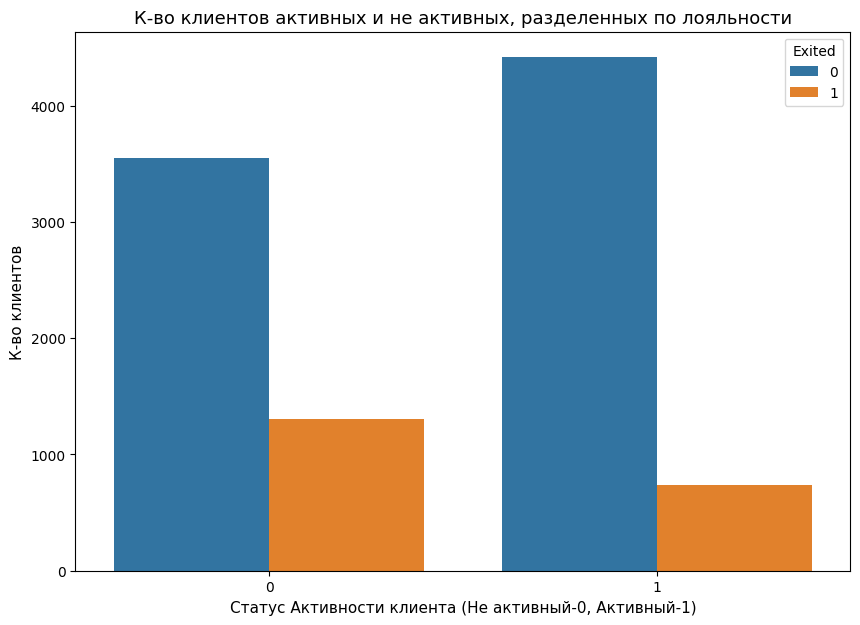

In [48]:
# Взаимозависимость двух категориальных.
# Можно использовать следующую строчку кода
# group_ac = churn_data.groupby(by=['IsActiveMember'], as_index=True)[['Exited']].mean()
# то есть сгруппировать по признаку IsActiveMember и посчитать средний отток про группам. Далее построим столбчатую диаграмму с двумя 
# барами, показывающими зависимость оттока от маркера Активности пользователя. Но я все же решил построить многоуровневую столбчатую
# диаграмму с лояльными и ушедшими клиентами.
# Зависимость числового признака от двух категориальных. 
# группируем данный Дата фрейм по статусу активности (IsActiveMember), 
# а потом для каждого статуса активности- по лояльности(Exited). Для каждого получившегося сочетания признаков посчитаем к-во клиентов
group_ac = churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=True)[['CustomerId']].count()
# построим многоуровневую столбчатую диаграмму. Источник данных наша сгруппированная таблица group_ac. В качестве параметра hue, 
# выберем лольность (Exited), по оси х- статус актиности (IsActiveMember), по оси у- среднее (в нашем случае это единственное значение) 
# к-во клиентов, соответствующих сочетантю данных признаков. 
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data= group_ac,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited'
)
barplot.set_title('К-во клиентов активных и не активных, разделенных по лояльности', fontsize=13)
barplot.set_xlabel('Статус Активности клиента (Не активный-0, Активный-1)', fontsize=11)
barplot.set_ylabel('К-во клиентов', fontsize=11)
plt.show;

Ответ: 
1. Среди активных клиентов больше лояльных (4416 против 3547), и наоборт меньше ушедших (735 против 1302).
Предложение банку: 
1. Среди признаков Дата Фрейма банк может повлиять на: NumOfProducts, HasCrCard, IsActiveMember.
Из предыдуших исследований мы  выяснили, что лояльность (Exited) сильно зависит от к-ва услуг банка, отсюда-
Предложение №1- Изучить неактивных клиентов в зависимости от к-ва услуг и где возможно сделать к-во услуг две. 
Так же мы знаем, что пик ушедших клиентов по возрасту от 48 до 60 лет, отсюда-
Предложение №2- изучить данную возрастную группу у неактивных клиентов, понять их потребности и предложить услуги, которые будут им и банку выгодными и удержат клиентов.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [49]:
# Используем библиотеку plotly express
# группируем по стране клиента, подсчитываем долю ушедших клиентов в каждой стране
choropleth_data = churn_data.groupby(by=['Geography'], as_index=True)[['Exited']].mean()
# display(choropleth_data)
#строим тепловую картограмму распределения по геолокации
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations = choropleth_data.index, #столбец с локациями
    locationmode = 'country names', #режим сопоставления локаций с базой plotly
    color='Exited', #от чего зависит цвет
    # animation_frame="date", #анимационный ползунок
    range_color=[0, 1],
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
#отображаем его
fig.show()

Ответ:
Результат распределения доли ушедших-   Germany    0.32;
                                        France     0.16; 
                                        Spain      0.17
В Германии самая большая доля ужедших клиентов, в 2 раза выше, чем во Франции.
Для объяснения этого найдем данные о населениях этих стран и среднем возрасте: Источник о населении https://en.wikipedia.org/wiki/List_of_European_countries_by_population; средний возраст https://dzen.ru/a/XjpZ5ngwVSZtX-r0 и https://nonews.co/directory/lists/countries/median-age:
            К-во ушедших   Всего клиентов          Население       Средний возраст
            клиентов
Germany         814         2509                     83.3 млн        47.8
France          810         5014                     68.2 млн        41.7
Spain           413         2477                     48.4 млн        43.9
1. В Германии банк менее популярен, чем во Франции и Испании (Население в Германии самое большое, а клиентов столько же как в Испании с населением в почти два раза меньше). А вот ушли из банка столько же клиентов, как во Франции, хотя во Франции в два раза больше клиентов, чем в Германии. Это можно объяснить, тем, что средний возраст в Германии около 48 лет, а это тот возраст, когда, как мы выяснили ранее (см. Ответ к вопросу 9.4) ушедших больше, чем лояльных клиентов.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

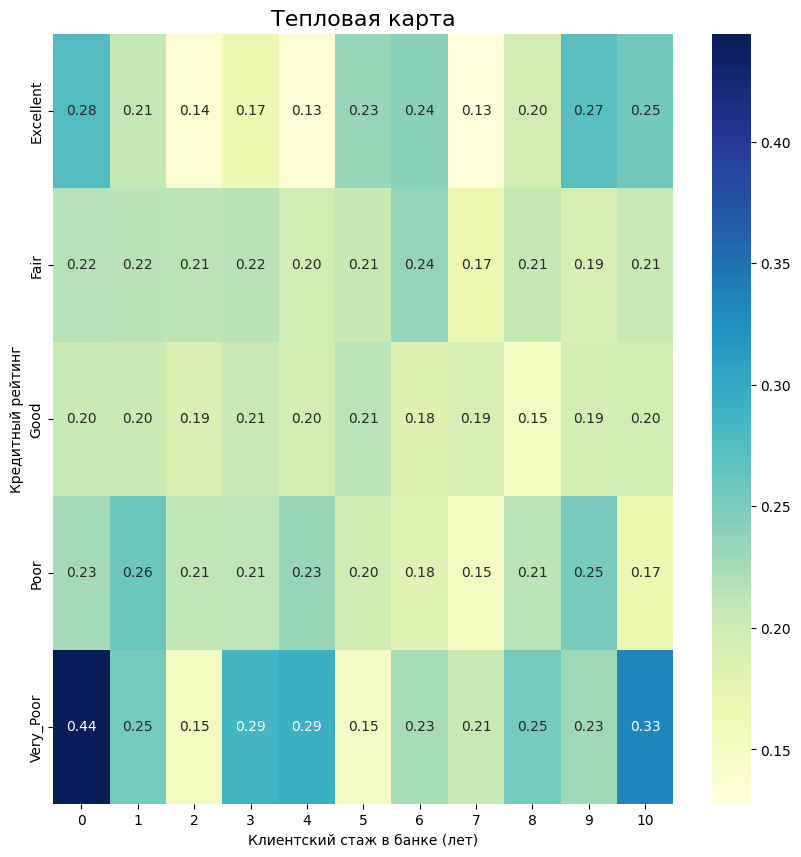

In [4]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
s1 =  churn_data['CreditScore']  
churn_data['CreditScoreCat'] = list(map(get_credit_score_cat, s1))
# display(churn_data)
pivot_9_10 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
# display(pivot_9_10)
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(data=pivot_9_10, annot=True, fmt=".2f", cmap='YlGnBu')
heatmap.set_title('Тепловая карта', fontsize=16)
# boxp.set_title('% от населения выздоровевших');
heatmap.set_xlabel('Клиентский стаж в банке (лет)')
heatmap.set_ylabel('Кредитный рейтинг');

Ответ: Чаще всех уходят клиенты с самым плохим кредитным рейтингом и клиентским стажем меньше года. Клиенты с самым плохим кредитным рейтингом уходят чаще, даже если их клинтский стаж больше года. Например, при стаже 10 лет доля оттока 0.33 - вторая по величине. Хочу отметить, что клиенты с самым плохим кредитным рейтингом и со стажем 2 и 5 лет, имееют довольно низкую долю оттока 0.15, меньше только у клиентов с самым высоким кредитным рейтингом на втором, четвертом и седьмом году стажа. Клиенты с рейтингом Poor, также уходят чаще, чем клиенты с рейтингами Good и Fair. Надо отметить, что клиенты с рейтингом Exellent имеют неоднозначную долю оттока, наряду с низкими, тут присутствуют и большие доли оттока: 0.28 для первого года стажа, 0.27 и 0.25 для 9 и 10 года соответственно.